In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 1000

In [3]:
ip = np.random.rand(N) > 0.5
ip = ip.astype(int)

In [4]:
Es = 1

In [5]:
eb_no_db = np.arange(0,25)

In [6]:
capacity_rate = np.zeros(len(eb_no_db))

capacity_rate_reduced = np.zeros(len(eb_no_db))

capacity_rate_CSIT_reduced = np.zeros(len(eb_no_db))
capacity_rate_CSIT = np.zeros(len(eb_no_db))

In [7]:
def capacity_each_channel(Es,nTx,noise_variance,S):
    
    Es = Es
    
    nTx = nTx
    
    noise_variance = noise_variance
    
    S = S
    
    capacity_each_channel = 0
    
    for kk in range(len(S)):
        
        
        c = np.log2(1 + np.divide(Es,np.multiply(nTx,noise_variance)) * (np.square(S[kk]) ))
        

        capacity_each_channel = capacity_each_channel + c
        
    return capacity_each_channel

In [8]:
def sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3):
    
    S = [S1, S2, S3, S4]
    
    q_optimal_3 = q_optimal_3
    
    sigma_four_q = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part + (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S)) * (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            sigma_four_q.append(qi)
            
        else:
            sigma_four_q = []
            
            sigma_four_q = q_optimal_3.copy()
            
            break
            
    return sigma_four_q

In [9]:
def sigma_three(noise_variance,S1,S2,S3,q_optimal_2):
    
    S = [S1, S2, S3]
    
    q_optimal_2 = q_optimal_2
    
    sigma_three_q = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part + (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S)) * (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0 ):
            
            sigma_three_q.append(qi)
            
        else:
            sigma_three_q = []
            
            sigma_three_q = q_optimal_2.copy() 
            
            break
            
    return sigma_three_q

In [10]:
def sigma_two(noise_variance,S1,S2,q_optimal_1):
    
    S = [ S1 , S2 ]
    
    q_optimal_1 = q_optimal_1

    sigma_two_q  = []
    
    summation_part = 0
    
    for kk in range(len(S)):
        
        summation_part = summation_part +  (noise_variance/np.square(S[kk]))
        
    mu = (1/len(S))* (Es + summation_part)
    
    for mm in range(len(S)):
        
        qi = mu - (noise_variance/np.square(S[mm]))
        
        if(qi > 0):
            
            sigma_two_q.append(qi)
            
        else:
            sigma_two_q = []
            
            sigma_two_q = q_optimal_1.copy()
            
            break
            
    return sigma_two_q

In [11]:
def sigma_one(noise_variance,S1):
    
    
    S = [S1]
    
    
    sigma_one_q = []
    
    summation_part = noise_variance / np.square(S1)
    
    mu = (1/len(S)) * (Es + summation_part )
    
    q_optimal = mu - (noise_variance / np.square(S1))
    
    if q_optimal > 0 :
        
        sigma_one_q.append(q_optimal)
        
    
    
    return sigma_one_q

In [12]:
def capacity(noise_variance,S):
    
    S1 = S[0]
    
    S2 = S[1]
    
    S3 = S[2]
    
    S4 = S[3]
    
    S = [S1, S2, S3, S4]
    
    total_capacity = 0
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    c1 = np.log2(1 + (1/noise_variance)* np.square(S1) * q_optimal_1[0])
    
    q_optimal_2 = sigma_two(noise_variance,S1,S2,q_optimal_1)
    
    c2 =0
    
    for nn in range(len(q_optimal_2)):
        
        c2 = c2 + np.log2(1 + (1/noise_variance)* np.square(S[nn])*q_optimal_2[nn])
        
    q_optimal_3 = sigma_three(noise_variance,S1,S2,S3,q_optimal_2)
    
    c3 =0
    
    for pp in range(len(q_optimal_3)):
        
        c3 = c3 + np.log2(1 + (1/noise_variance)* np.square(S[pp])*q_optimal_3[pp])
        
    q_optimal_4 = sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3)
    
    c4 = 0
    
    for ss in range(len(q_optimal_4)):
        
        c4 = c4 + np.log2(1 + (1/noise_variance)* np.square(S[ss])*q_optimal_4[ss])
    
    c = [c1, c2, c3, c4]
    
    c = max(c)
    
    return c

In [13]:
def diagonalQ(noise_variance,S):
    
    S1 = S[0]
    
    S2 = S[1]
    
    S3 = S[2]
    
    S4 = S[3]
    
    S = [S1, S2, S3, S4]
    
    q_optimal_1 = sigma_one(noise_variance,S1)
    
    q_optimal_2 = sigma_two(noise_variance,S1,S2,q_optimal_1)
    
    q_optimal_3 = sigma_three(noise_variance,S1,S2,S3,q_optimal_2)
    
    q_optimal_4 = sigma_four(noise_variance,S1,S2,S3,S4,q_optimal_3)
    
    return q_optimal_4

In [14]:
def Capacity_Rs():
    
    
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        snr = 10**(eb_no_db[jj] / 10)
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        Rs = np.divide(Es, nTx) * np.eye(nTx)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
    
            H_hermitian = np.conjugate(H)
        
            H_hermitian = np.transpose(H_hermitian)
            
            X = np.dot(np.dot(np.dot(Rz_inverse, H), Rs), H_hermitian)
            
            Y = np.eye(4)
            
            Z = X + Y
            
            c = np.log2(np.abs(np.linalg.det(Z)))
            
            capacity += c

        capacity =capacity / N
        
        capacity_rate[jj] = capacity
        
        

    return capacity_rate


In [15]:
def capacity_reduced_form():
    
    for jj in range(len(eb_no_db)):
        
        nTx = 4
        
        nRx = 4
        
        Es = 1
        
        Rz = 10**(-eb_no_db[jj] / 10) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz)
        
        capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U, S, Vh = np.linalg.svd(H)
    
            noise_variance = 10**(-eb_no_db[jj] / 10)
        
            c = capacity_each_channel(Es,nTx,noise_variance,S)
            
            capacity = capacity + c    
        
        capacity = capacity / N
        
        capacity_rate_reduced[jj] = capacity
        
    return capacity_rate_reduced

In [16]:
def reduced_csit():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        noise_variance = (1/snr)
        
        nTx = 4
        
        nRx = 4
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            U,S,Vh = np.linalg.svd(H)
            
            capacity_values = capacity(noise_variance,S)
            
            total_capacity = total_capacity + capacity_values
            
        capacity_rate_CSIT_reduced[jj] = total_capacity / N
        
    return capacity_rate_CSIT_reduced
            

In [17]:
def csit_Rs():
    
    for jj in range(len(eb_no_db)):
        
        snr = 10**(eb_no_db[jj] / 10)
        
        nTx = 4
        
        nRx = 4
        
        Rz = (1/snr) * np.eye(nRx)
        
        Rz_inverse = np.linalg.inv(Rz )
        
        noise_variance = (1/snr)
        
        total_capacity = 0
        
        for ii in range(N):
            
            H = (1/np.sqrt(2)) * (np.random.randn(nTx,nRx) + 1j * np.random.randn(nTx,nRx))
            
            H_hermitian = np.conjugate(H)
            
            H_hermitian = np.transpose(H_hermitian)
            
            U,S,Vh = np.linalg.svd(H)
            
            V = np.conjugate(Vh)
            
            V = np.transpose(V)
            
            diagonal_q = diagonalQ(noise_variance,S)
            
            
            diagonal_matrix = np.diag(diagonal_q)
            
            if diagonal_matrix.shape[0] < 4 or diagonal_matrix.shape[1] < 4:
                
                diagonal_matrix = np.pad(diagonal_matrix, ((0, 4 - diagonal_matrix.shape[0]), (0, 4 - diagonal_matrix.shape[1])), mode='constant')
            
            Rs = V @ diagonal_matrix @ Vh
            
            z = (np.eye(nRx) + Rz_inverse @ H @ Rs @ H_hermitian)
            
            c = np.linalg.det(z)
            c = np.log2(abs(c))
            
            total_capacity = total_capacity + c
            
        capacity_rate_CSIT[jj] = total_capacity / N
    
    return capacity_rate_CSIT

[0.577697338231605, 0.34994429927644594, 0.07235836249194905]
[0.5674915551364764, 0.4191621454179843, 0.013346299445539223]
[0.5624967871107088, 0.43750321288929117]
[0.5332639524193155, 0.46673604758068454]
[0.5399136630084208, 0.4600863369915792]
[0.5064766853580834, 0.4712113755668257, 0.02231193907509088]
[0.5161899804691811, 0.4838100195308188]
[0.41709963850940157, 0.3424222932091804, 0.24047806828141804]
[0.5384549813513136, 0.46154501864868624]
[0.4647912871013705, 0.4419081140450394, 0.09330059885358988]
[0.4788508433168576, 0.3581449500940906, 0.16300420658905174]
[0.42635783870201316, 0.4035916816373262, 0.17005047966066072]
[0.5664815112943118, 0.43351848870568827]
[0.41461608993053733, 0.37260437087246784, 0.2127795391969945]
[0.5640839776761034, 0.3782368563795302, 0.05767916594436606]
[0.5161707088587332, 0.4150341707425019, 0.06879512039876479]
[0.562617634552241, 0.4373823654477591]
[0.3943643659215621, 0.32258781060362784, 0.28304782347480995]
[0.5553559176121005, 0.

[0.5179055342899754, 0.44673645672175827, 0.035358008988266354]
[0.4827683289778517, 0.42447715126516183, 0.09275451975698634]
[0.5933400216196069, 0.3863639176713511, 0.020296060709041774]
[0.4372332515235979, 0.3786542908485936, 0.18411245762780842]
[0.47611563051649797, 0.3948649624436361, 0.12901940703986553]
[0.48273725049650795, 0.4158483999619971, 0.10141434954149497]
[0.5709114383539513, 0.3178416259461398, 0.11124693569990851]
[0.5563967448899595, 0.44360325511004045]
[0.6152260836220554, 0.3847739163779446]
[0.6068752955458867, 0.39312470445411335]
[0.590835663385884, 0.40916433661411594]
[0.4664671817791084, 0.42870877294963344, 0.1048240452712581]
[0.5888148933701604, 0.39879787013405776, 0.012387236495781773]
[0.4396390900430091, 0.34745190244345286, 0.21290900751353775]
[0.582992465271251, 0.417007534728749]
[0.5928618628876472, 0.4071381371123528]
[0.4967269561411029, 0.36879540682092377, 0.13447763703797327]
[0.5473414112493367, 0.45265858875066334]
[0.5183089030979044,

[0.508537628592957, 0.4914623714070431]
[0.4659128224785983, 0.31554231334228927, 0.2185448641791124]
[0.5505297092780248, 0.4494702907219752]
[0.5640737944282157, 0.4359262055717842]
[0.5906621038410477, 0.32896179865571107, 0.08037609750324137]
[0.5245490931771761, 0.47545090682282387]
[0.5433922718410733, 0.45660772815892664]
[0.4533737424203756, 0.327584815198169, 0.2190414423814554]
[0.5619125037154205, 0.43808749628457955]
[0.500003643667477, 0.420456888988767, 0.07953946734375594]
[0.42281834937018037, 0.35807219298084786, 0.21910945764897166]
[0.5325296308769052, 0.4674703691230947]
[0.4568532078261911, 0.323646769489947, 0.21950002268386187]
[0.4729830400188399, 0.3586246592692722, 0.16839230071188793]
[0.4634547339273701, 0.35973613081629163, 0.17680913525633818]
[0.5194064219572554, 0.48059357804274455]
[0.4939634084159298, 0.43343783478388465, 0.07259875680018552]
[0.4429250568025612, 0.37446743676239264, 0.18260750643504614]
[0.6077129428508817, 0.39228705714911816]
[0.532

[0.4422564731965717, 0.33048466693361406, 0.2272588598698141]
[0.44170809618535845, 0.3871330364021161, 0.17115886741252528]
[0.4658206452580502, 0.4050239839388925, 0.12915537080305728]
[0.40751327118199754, 0.3642212899860918, 0.22826543883191067]
[0.4317777759762246, 0.36888246712760797, 0.19933975689616729]
[0.5392520111337342, 0.4607479888662658]
[0.42548395215367163, 0.3949276022217557, 0.17958844562457277]
[0.435822692697585, 0.35411832799234727, 0.21005897931006778]
[0.3999041020095822, 0.347769339277077, 0.25232655871334075]
[0.4429284909956567, 0.4149552052759303, 0.14211630372841272]
[0.47629929957885664, 0.3925723303695845, 0.1311283700515588]
[0.4362725809112556, 0.3489384138356646, 0.2147890052530796]
[0.4826366308781235, 0.4178169410588475, 0.09954642806302888]
[0.5087020036339357, 0.3911776631221132, 0.10012033324395109]
[0.3974683470783072, 0.3578309948866111, 0.24470065803508184]
[0.5607072989662216, 0.4392927010337784]
[0.4065922566304786, 0.3738721002467549, 0.21953

[0.4531264906896705, 0.37018302591529006, 0.1766904833950394]
[0.5318023102356102, 0.420607835961642, 0.04758985380274772]
[0.5666328772955828, 0.42741014130034244, 0.005956981404074635]
[0.47526376995390396, 0.31089958211643276, 0.18027585219378045, 0.033560795735883]
[0.43141865710762684, 0.3859599444118814, 0.1826213984804918]
[0.5170994782365574, 0.4829005217634425]
[0.4667968403983446, 0.36772201360750156, 0.16548114599415353]
[0.39667371470043317, 0.3243938287723552, 0.27893245652721166]
[0.409563752545322, 0.3602839073855484, 0.23015234006912957]
[0.5219416087369199, 0.47805839126308014]
[0.4184734942060711, 0.33155513664294156, 0.24997136915098722]
[0.5346845370004756, 0.40695173589718503, 0.05836372710233917]
[0.42454538479192644, 0.30792473401226206, 0.2675298811958114]
[0.49889613497870944, 0.44362850901637196, 0.057475356004918376]
[0.48200207022842767, 0.40457477694041716, 0.113423152831155]
[0.39845158142555054, 0.35978900715059203, 0.24175941142385718]
[0.461114964178946

[0.41989927301027624, 0.34038794062679156, 0.2397127863629322]
[0.43022468287613935, 0.39341042057647896, 0.1763648965473817]
[0.40482881782800617, 0.370621776425773, 0.22454940574622076]
[0.39793140125452237, 0.33622582567207787, 0.2658427730733995]
[0.39153117368905355, 0.3692837403757504, 0.23918508593519605]
[0.44075677724344786, 0.3922227850311566, 0.1670204377253956]
[0.4005203111698507, 0.3662222692118203, 0.23325741961832894]
[0.5080554619864907, 0.3891125467585327, 0.10283199125497638]
[0.37205812355559115, 0.32554195447783424, 0.30239992196657467]
[0.4533599145026972, 0.4311402615881343, 0.11549982390916841]
[0.41975996299515683, 0.3909301588031858, 0.18930987820165723]
[0.386847728591532, 0.35937943175664455, 0.25377283965182335]
[0.4406025156769901, 0.3833762598949576, 0.1760212244280523]
[0.3918663957491351, 0.3369984663774892, 0.27113513787337573]
[0.39962816757290187, 0.3643104376971738, 0.2360613947299243]
[0.504901927858124, 0.4351820480530385, 0.05991602408883745]
[0.

[0.38668946195395837, 0.36663291175321827, 0.2466776262928233]
[0.4295974997722065, 0.38146448329429317, 0.1889380169335001]
[0.5184040272766595, 0.4815959727233406]
[0.38108589303061036, 0.33497926744732803, 0.28393483952206156]
[0.4180062405009942, 0.3787050718800447, 0.19392676880402493, 0.009361918814936199]
[0.4147706256985312, 0.3186053601799357, 0.26662401412153325]
[0.4728003158256619, 0.3582734747953987, 0.1496353230047905, 0.019290886374148997]
[0.46547692362209536, 0.4056331642466293, 0.12888991213127526]
[0.36598636852480393, 0.3220692201549436, 0.20557256538131982, 0.10637184593893262]
[0.3968424249202986, 0.3489390718335346, 0.25421850324616657]
[0.46553879755198163, 0.433477803847775, 0.10098339860024336]
[0.3973411646091058, 0.36754248723826144, 0.23511634815263266]
[0.4091645730240279, 0.39000300043561226, 0.2008324265403598]
[0.4915397664345433, 0.38435228211781236, 0.12410795144764447]
[0.3822012273197145, 0.33883089844973546, 0.2789678742305499]
[0.3832280375244127,

[0.4982604389780746, 0.4640866580800586, 0.03765290294186674]
[0.38648371749559246, 0.35814625722164206, 0.2160353983602124, 0.03933462692255307]
[0.5128460887412234, 0.3974419057708226, 0.08971200548795405]
[0.5249568477646473, 0.47504315223535276]
[0.41488434784473827, 0.36145923311189665, 0.22365641904336514]
[0.39362200478166903, 0.37121865513353414, 0.2351593400847966]
[0.5241333171663319, 0.4220763082867873, 0.05379037454688074]
[0.41946252269762985, 0.39500268412833384, 0.1855347931740362]
[0.39581269702131905, 0.373676439352119, 0.23051086362656184]
[0.3939401162087915, 0.3298097600989046, 0.27625012369230395]
[0.4005972024583828, 0.34321619219230476, 0.2561866053493123]
[0.5120444485712864, 0.4617222748299418, 0.026233276598771615]
[0.43476378192778886, 0.40416559826868415, 0.16107061980352683]
[0.40665825347676005, 0.3690914047357071, 0.21711114166303966, 0.007139200124493095]
[0.3959785328408667, 0.3224542352185956, 0.2815672319405378]
[0.3689107430412174, 0.353350909386999,

[0.3657582670626998, 0.333982281949692, 0.3002594509876081]
[0.3836465132035603, 0.3388939660682922, 0.2774595207281473]
[0.4143764878843162, 0.38727674720841504, 0.19834676490726882]
[0.3945484255232933, 0.384543201050956, 0.22090837342575062]
[0.37675348229748484, 0.36651942188373804, 0.25672709581877695]
[0.3958704047026199, 0.3612971192033378, 0.24283247609404215]
[0.3769993494495626, 0.36764112834660473, 0.2553595222038328]
[0.40559217209835224, 0.3613179843310143, 0.2330898435706333]
[0.5662990766341643, 0.4337009233658356]
[0.45656332925099546, 0.41026748103532923, 0.13316918971367525]
[0.4243885216130147, 0.3699125085439829, 0.2056989698430022]
[0.41209061978569805, 0.3861388856088269, 0.20177049460547503]
[0.4744375899186346, 0.40391409275092194, 0.12164831733044323]
[0.46714147743039725, 0.4129574684522919, 0.11990105411731083]
[0.50720102031873, 0.45175513681610713, 0.04104384286516294]
[0.42939799590986283, 0.3293813859378065, 0.2412206181523306]
[0.4198560635259533, 0.3503

[0.3661333135814585, 0.3482025233186612, 0.28566416309988013]
[0.3755765382051625, 0.3387602464727156, 0.28566321532212174]
[0.3902090329710731, 0.3498176764522456, 0.25997329057668117]
[0.35072471337969385, 0.3362458011972647, 0.31302948542304143]
[0.31689635238871416, 0.29503768643436296, 0.2660185605667763, 0.12204740061014652]
[0.37136158119734647, 0.3446015177290976, 0.28403690107355584]
[0.3785269752170033, 0.350709599866824, 0.27076342491617256]
[0.3555211898678167, 0.34348320564143303, 0.3009956044907501]
[0.36173740094539364, 0.3406688419277671, 0.2975937571268392]
[0.3865988165012971, 0.35310966908648106, 0.26029151441222165]
[0.3813174068363038, 0.3627066761305311, 0.2559759170331652]
[0.3927555705389818, 0.370065453274693, 0.23717897618632516]
[0.45374084788689073, 0.39327696986808675, 0.15298218224502247]
[0.3510837635671701, 0.33595569999046837, 0.3129605364423614]
[0.37396977930232017, 0.3497339812888553, 0.2762962394088243]
[0.35547341995800763, 0.3395537357132542, 0.22

[0.35902409562933335, 0.33328999559746997, 0.30768590877319646]
[0.36824786327362025, 0.3516104615808604, 0.28014167514551924]
[0.36880072579026346, 0.3410524578155638, 0.2901468163941726]
[0.3511494695021828, 0.33594161200407, 0.31290891849374725]
[0.37536451274620336, 0.35004523580181657, 0.27459025145198]
[0.36440833822858826, 0.347267529447414, 0.2883241323239977]
[0.35621081432661805, 0.33767574343641565, 0.3061134422369663]
[0.3580204305845185, 0.3419449695050112, 0.30003459991047016]
[0.3847843413145087, 0.3540488084729482, 0.26116685021254293]
[0.43094496428997686, 0.4014807486916775, 0.16757428701834548]
[0.4045471517956916, 0.37546401130540924, 0.21998883689889914]
[0.37115945381118237, 0.34081011340388107, 0.2880304327849364]
[0.35830313278162196, 0.3314734320867992, 0.3102234351315789]
[0.33579037628281416, 0.3274442873830653, 0.3040716271948056, 0.03269370913931485]
[0.36210976882081164, 0.34142217662229174, 0.28146753372107686, 0.015000520835819875]
[0.37499825622144517, 

[0.35753784716342174, 0.33298028167628985, 0.3094818711602883]
[0.358846138973757, 0.3487680861469812, 0.2923857748792618]
[0.34932043974182636, 0.34088097529216943, 0.30979858496600426]
[0.37208214211895907, 0.3536403535474149, 0.2742775043336261]
[0.3527654475531433, 0.33482291229020184, 0.3124116401566548]
[0.39255294968012505, 0.3707062476655699, 0.236740802654305]
[0.35822331630791954, 0.3330747663774242, 0.30870191731465624]
[0.36760674584367475, 0.32537504722655586, 0.2662033543760081, 0.04081485255376127]
[0.41730442032809884, 0.3805242683601035, 0.2021713113117976]
[0.3724039441080352, 0.3527849181215816, 0.2748111377703833]
[0.36557018679229497, 0.3536687358645816, 0.28076107734312333]
[0.366144773365198, 0.34997052970615977, 0.2838846969286422]
[0.3531359420171492, 0.34023201880666903, 0.30663203917618176]
[0.3607396406257759, 0.3481203438954571, 0.29114001547876683]
[0.438443202991317, 0.4104752520858405, 0.15108154492284237]
[0.30884295860818956, 0.2916513007308833, 0.2498

[0.3490593030138958, 0.33857871235044423, 0.3123619846356599]
[0.322485893340974, 0.3185983241068069, 0.288485854603738, 0.07042992794848107]
[0.35329054768215923, 0.3406315061731343, 0.3060779461447064]
[0.3933880067279175, 0.3839372601691905, 0.2226747331028919]
[0.3651976556191733, 0.35651385693137677, 0.2782884874494499]
[0.34551684826031726, 0.3118589570203996, 0.2865637237240073, 0.056060470995275835]
[0.32962221299363526, 0.3111645710307055, 0.2727973847431298, 0.08641583123252938]
[0.343707765651641, 0.3358465036312006, 0.3204457307171583]
[0.3532452424085123, 0.3409431628144346, 0.3058115947770529]
[0.3722982535386751, 0.3209814623147023, 0.30672028414662256]
[0.35757677605272875, 0.33766148265513135, 0.3047617412921399]
[0.36962207145643794, 0.3455491405615471, 0.2848287879820147]
[0.4317264855766925, 0.4062583016597798, 0.16201521276352765]
[0.3591255441918091, 0.3304400977794342, 0.3024811610055473, 0.007953197023209402]
[0.38740612247296496, 0.3724406365086083, 0.240153241

[0.3603025867591039, 0.3552101890543743, 0.2844872241865217]
[0.3126100400774289, 0.30814549551429193, 0.29482543255151455, 0.08441903185676461]
[0.34800543943349366, 0.33989200290134347, 0.3121025576651627]
[0.37068380687571995, 0.36095126371349706, 0.26836492941078305]
[0.35327459630861247, 0.3375808356689858, 0.3091445680224018]
[0.3720344798301584, 0.3454605477922355, 0.2825049723776061]
[0.3676434875906563, 0.3382264489779605, 0.2941300634313832]
[0.3060240572645554, 0.29490167957970065, 0.26407695171138806, 0.13499731144435592]
[0.3007331403353982, 0.2936441373872194, 0.27855347719967405, 0.12706924507770828]
[0.3568588799747995, 0.35178965008122737, 0.2913514699439732]
[0.2918404969616487, 0.2711690633735192, 0.256452810624754, 0.18053762904007822]
[0.3056370834485562, 0.28613610793699507, 0.23599814791258328, 0.17222866070186524]
[0.38596103544573773, 0.35381070973859696, 0.26022825481566547]
[0.3845169305572337, 0.36586310789518717, 0.2496199615475792]
[0.35089380791424, 0.341

[0.35916846910821326, 0.35595256839074924, 0.2848789625010375]
[0.3497742984936367, 0.3361289100743172, 0.3140967914320459]
[0.3257916758665989, 0.31370032000798437, 0.2645222826971366, 0.0959857214282801]
[0.28799352114992194, 0.2792287704849898, 0.2495202233295011, 0.1832574850355871]
[0.3651085145350461, 0.3188865525468169, 0.30214865681105885, 0.01385627610707807]
[0.29375715877079406, 0.27871276526216726, 0.24900211867430086, 0.17852795729273782]
[0.33745544474958433, 0.3337824587006275, 0.32876209654978816]
[0.3543027318035014, 0.3457006515896614, 0.2999966166068371]
[0.3288980524528505, 0.3067396594847269, 0.2699477842168477, 0.0944145038455749]
[0.34984405992966094, 0.3427649800367939, 0.3073909600335452]
[0.32281263580907993, 0.3107065721697421, 0.25236161821588793, 0.11411917380529005]
[0.3699769440103207, 0.3518997657706077, 0.27812329021907156]
[0.35043038882970134, 0.34322141474608414, 0.3063481964242144]
[0.30742910437943655, 0.2973096536572619, 0.2780233408085255, 0.1172

[0.3362488715478328, 0.32824309936782536, 0.29700581472963944, 0.038502214354702524]
[0.3518009075222116, 0.3382709766184126, 0.30992811585937574]
[0.3488377119252648, 0.33419619841901377, 0.3169660896557213]
[0.3559939417961711, 0.3317296961019549, 0.31227636210187404]
[0.3088407043380935, 0.30155971719864955, 0.2771924718337046, 0.11240710662955244]
[0.3533080655830255, 0.34837822261862994, 0.2983137117983444]
[0.29803205092656887, 0.2894651309100896, 0.25077411957318696, 0.1617286985901546]
[0.28620240806004343, 0.27719211239425123, 0.2642017927661849, 0.17240368677952034]
[0.284872114249962, 0.27553913072686614, 0.2538415446859641, 0.1857472103372078]
[0.3227422736450512, 0.31403108692524356, 0.2739179884655087, 0.08930865096419646]
[0.36197532739473975, 0.3585219349423192, 0.27950273766294087]
[0.32284887756120983, 0.31408761693057485, 0.27973406905061204, 0.08332943645760316]
[0.3428612466046325, 0.33079026661062355, 0.32634848678474393]
[0.3665672752279503, 0.35833643247141683, 

[0.35801416380791834, 0.34963468746728177, 0.2923511487247997]
[0.40747673001468726, 0.40195608265059357, 0.19056718733471917]
[0.29731204570029257, 0.29194635502945065, 0.2566267918533736, 0.15411480741688324]
[0.32439603709631987, 0.32041418673470856, 0.3056550929942148, 0.04953468317475679]
[0.36185060646611605, 0.34440317999923103, 0.2937462135346529]
[0.34062059367935665, 0.33450346402528397, 0.3248759422953593]
[0.3452349193052076, 0.34116681895229894, 0.3135982617424934]
[0.34930205944274345, 0.3405818826255645, 0.31011605793169195]
[0.34106705126731934, 0.3346920382333241, 0.3242409104993566]
[0.3306928813489274, 0.32369874867163567, 0.30580363220234774, 0.039804737777089205]
[0.3468030421909201, 0.33498178798775224, 0.3182151698213277]
[0.2746357486099084, 0.2694038184612053, 0.26376883019330793, 0.1921916027355784]
[0.3221534074546741, 0.31975563593654316, 0.2957807635240686, 0.06231019308471414]
[0.33963406639419946, 0.3355195213336859, 0.32484641227211447]
[0.32456736311136

[0.3396203510211647, 0.33599027316142466, 0.32438937581741056]
[0.30650339056754716, 0.2992048449032061, 0.2901035701753702, 0.10418819435387641]
[0.31247130447126853, 0.30926062850972247, 0.2942749552033467, 0.0839931118156623]
[0.3461457433700636, 0.33756099017402014, 0.3162932664559163]
[0.27697268814919973, 0.2737644324216815, 0.256080111393183, 0.1931827680359357]
[0.31102400862103335, 0.3015961993025226, 0.24834139861490612, 0.1390383934615379]
[0.2848019655522438, 0.2772207661513596, 0.25420064408215703, 0.18377662421423954]
[0.34925872608158115, 0.34842124657470486, 0.3023200273437138]
[0.3360240248927776, 0.33161110300240765, 0.2768750258553975, 0.05548984624941733]
[0.3550236306937013, 0.34773160127008057, 0.297244768036218]
[0.34031204316062563, 0.33684503007355904, 0.3228429267658153]
[0.3612512294743847, 0.35361225050508405, 0.28513652002053125]
[0.2954011682146952, 0.2877310398339624, 0.24775450112660022, 0.16911329082474208]
[0.3523013417990116, 0.34443987854887514, 0.30

[0.3452952154898988, 0.34135227717831207, 0.3133525073317892]
[0.33551998569898017, 0.33330876592105685, 0.33117124837996287]
[0.3465325138808071, 0.3347083422588545, 0.3187591438603384]
[0.26095992722876915, 0.2560512757905079, 0.24887919111699608, 0.23410960586372676]
[0.33718483961512347, 0.3348626721805679, 0.3279524882043085]
[0.27298863617853986, 0.2677101891644174, 0.26092987305354265, 0.19837130160350008]
[0.3430817748020077, 0.33653263277583007, 0.3203855924221623]
[0.2871214694174175, 0.2819109935183525, 0.26357614138420793, 0.16739139568002215]
[0.3380668621694071, 0.33248258618865784, 0.32945055164193493]
[0.3214785614967413, 0.3184782830559912, 0.30396172325577175, 0.056081432191495806]
[0.29263803343330536, 0.28955812059635033, 0.27638724875182313, 0.14141659721852126]
[0.3061806517616669, 0.299731574624393, 0.2888328326561761, 0.10525494095776403]
[0.353040520480648, 0.3466755331633986, 0.30028394635595346]
[0.28233231214958154, 0.28109923413182625, 0.27343019302554, 0.1

[0.290313675399672, 0.27252335965498453, 0.24962519887922507, 0.1875377660661184]
[0.3427032080504323, 0.3401812624682059, 0.3171155294813616]
[0.30649150437864225, 0.304875934239286, 0.27970730007733446, 0.10892526130473734]
[0.27956583792970396, 0.27525895917131127, 0.25114929556739357, 0.19402590733159114]
[0.26754729355636303, 0.2637062138946371, 0.25666551114151237, 0.21208098140748743]
[0.29641047174760393, 0.28986699294863283, 0.2834363219094132, 0.13028621339434993]
[0.3378032769856858, 0.3330790713939702, 0.3291176516203438]
[0.3147645492443575, 0.31042947749408906, 0.2922199294772735, 0.08258604378428006]
[0.28386124587359013, 0.2783407598904124, 0.26247921248420036, 0.17531878175179716]
[0.35173158927992426, 0.346800693766725, 0.3014677169533507]
[0.2939369020498763, 0.29161094012034194, 0.28423681816852786, 0.13021533966125381]
[0.340317723498749, 0.335615600253139, 0.32406667624811186]
[0.2756641690912459, 0.2735286774079024, 0.26539123264908265, 0.18541592085176906]
[0.34

[0.31608410984125723, 0.31338868654474444, 0.2752389342807221, 0.09528826933327633]
[0.3370717313512653, 0.33480284612908956, 0.32812542251964516]
[0.28461486863734065, 0.28285629565890413, 0.2789052266009298, 0.1536236091028253]
[0.2622170031866645, 0.26039914412072895, 0.25650629559696314, 0.22087755709564333]
[0.2838787070003182, 0.2812466550090705, 0.2661655135086707, 0.16870912448194064]
[0.2864863877123867, 0.2829814198125299, 0.2796562199127042, 0.15087597256237933]
[0.3366280650830557, 0.3343424390135388, 0.3290294959034055]
[0.32307169496992, 0.3207852292462958, 0.3167010462043766, 0.03944202957940751]
[0.2796612362122278, 0.27296707773393464, 0.25805265574088093, 0.18931903031295658]
[0.27285063025477574, 0.2699195538731999, 0.26343112454598744, 0.193798691326037]
[0.33817266636970933, 0.33437242034415726, 0.32745491328613335]
[0.26313134850634234, 0.2610515827540241, 0.25805049734477614, 0.21776657139485744]
[0.30255475788477565, 0.30048211915764156, 0.29246417617740483, 0.1

[0.26583643134660495, 0.26417829090364675, 0.2517604382990303, 0.218224839450718]
[0.2628966801300925, 0.2608882908284535, 0.2510328106111535, 0.2251822184303007]
[0.26576214458330816, 0.2630717697520561, 0.2574603713318077, 0.21370571433282814]
[0.278158472743559, 0.2763602081196789, 0.27276397920708617, 0.17271733992967597]
[0.2836744527390699, 0.28155542761190194, 0.2795752424657258, 0.15519487718330247]
[0.2782004056027174, 0.27706091907085917, 0.2609607723083614, 0.183777903018062]
[0.2672682018770617, 0.26324563858632966, 0.258301657921516, 0.21118450161509267]
[0.26250592385221594, 0.26069110796455625, 0.2506675550303389, 0.2261354131528888]
[0.3127069419741987, 0.31046359400019147, 0.290094273735287, 0.0867351902903229]
[0.2655144131844844, 0.26348719984256613, 0.2498639741501248, 0.2211344128228247]
[0.26157659279421025, 0.2605923739642367, 0.25694852471736773, 0.22088250852418528]
[0.29408883360516413, 0.29264580797042544, 0.29090858306689654, 0.12235677535751402]
[0.33657178

[0.25489008926862444, 0.2533939044557182, 0.25081889111575023, 0.24089711515990708]
[0.3073168286219318, 0.3048493379717788, 0.2941773931374743, 0.0936564402688152]
[0.30343339817332365, 0.3002141760664869, 0.2875030863069135, 0.1088493394532759]
[0.25489494856273914, 0.2530330078118909, 0.2515123728304408, 0.24055967079492913]
[0.26297706126077725, 0.2612494750372692, 0.2575844836724468, 0.21818898002950662]
[0.270144026196363, 0.26914391638072044, 0.25443150655737345, 0.20628055086554298]
[0.33621941810874295, 0.3334970489562037, 0.3302835329350532]
[0.2980172745902205, 0.2966596674030805, 0.2926430067361658, 0.11268005127053313]
[0.2572142787661219, 0.25444883242029465, 0.24957384350471468, 0.23876304530886888]
[0.3376129644289858, 0.33538068009521926, 0.32700635547579493]
[0.33134352881566975, 0.3291939866664546, 0.31331004989167616, 0.026152434626199428]
[0.2908912853685822, 0.28996907932760396, 0.284469583901804, 0.13467005140200983]
[0.2667863447200591, 0.2662896113698159, 0.259

[0.3361502257782758, 0.3347553405458945, 0.3290944336758297]
[0.347100433571834, 0.3459267584240509, 0.306972808004115]
[0.32048390564434964, 0.31848510767736876, 0.309564344893864, 0.05146664178441762]
[0.31802256721517197, 0.3169777072196052, 0.31490638614901695, 0.05009333941620586]
[0.2630651827263101, 0.26216161945134137, 0.24979128076086796, 0.22498191706148052]
[0.3354214741173831, 0.3334423592845804, 0.33113616659803646]
[0.3004255092741541, 0.29824914890054016, 0.2886866562111367, 0.11263868561416907]
[0.25637574999093105, 0.25442164252955873, 0.24674354871190043, 0.24245905876760984]
[0.25657311360845225, 0.25473543778970864, 0.2532715547981381, 0.2354198938037009]
[0.260409184856552, 0.2596711973426238, 0.24940585658591263, 0.2305137612149115]
[0.3361229419472791, 0.3350269145195314, 0.32885014353318937]
[0.26420142705996097, 0.2631926529343508, 0.25236011859336643, 0.2202458014123219]
[0.27442755846666084, 0.2696690783735937, 0.268264332077217, 0.1876390310825285]
[0.256452

[0.29222710541702357, 0.29119808720963314, 0.2899275889580981, 0.1266472184152452]
[0.2568286863981059, 0.25637625623323873, 0.25397706706127177, 0.23281799030738368]
[0.25742048050272603, 0.25720248908918436, 0.25075254878619235, 0.23462448162189728]
[0.2681935341497015, 0.2675502008511663, 0.26620909187050046, 0.1980471731286318]
[0.2610004358672802, 0.2598340095877592, 0.25822767445189015, 0.22093788009307053]
[0.2568744022756417, 0.25601758314714596, 0.2501668218308862, 0.23694119274632608]
[0.2541953062042398, 0.2535821918336295, 0.2518039780615463, 0.24041852390058435]
[0.29732977518050874, 0.2959601907831528, 0.29460736331903653, 0.1121026707173019]
[0.2560747918724634, 0.255380287928174, 0.2538778168151005, 0.23466710338426214]
[0.27496705158051354, 0.27392255173183794, 0.2726516498443465, 0.1784587468433021]
[0.28237671719936897, 0.2795354234708607, 0.2711451434316119, 0.16694271589815837]
[0.259673119296695, 0.25894277097731866, 0.25487637092641063, 0.22650773879957564]
[0.25

[0.26154718131654314, 0.2607320556227206, 0.2600236504205312, 0.21769711264020492]
[0.2588773496331134, 0.258446404473822, 0.2545497321007678, 0.22812651379229684]
[0.29589236712617073, 0.2946364533949629, 0.29297999187646073, 0.11649118760240565]
[0.26749923723979513, 0.2668522746317654, 0.26122646910472486, 0.2044220190237145]
[0.27223229713287483, 0.2712402515270944, 0.2568478727628549, 0.19967957857717578]
[0.2675870877529363, 0.2672220090477579, 0.2654649879084055, 0.1997259152909003]
[0.25190141195570215, 0.25147957208751753, 0.2503868584919746, 0.24623215746480562]
[0.3358406050832918, 0.33480112700809084, 0.32935826790861744]
[0.2587681770298881, 0.2582448689008042, 0.2571909004591445, 0.22579605361016314]
[0.2611315712218251, 0.26058786461779676, 0.25388669561191834, 0.22439386854845977]
[0.26831582166164025, 0.268052097595432, 0.2669575871074091, 0.1966744936355187]
[0.2619824891044804, 0.2618356266569155, 0.2583604531713923, 0.2178214310672118]
[0.25769579280186194, 0.257129

[0.2660214516300951, 0.2652252718292931, 0.26335292578994574, 0.205400350750666]
[0.25467556385024676, 0.2538123653452974, 0.2514352402799039, 0.2400768305245519]
[0.25627092888102027, 0.25585527637970634, 0.2547825497079478, 0.23309124503132558]
[0.263278491252354, 0.26250832424766524, 0.2604102576424031, 0.21380292685757774]
[0.2639020393655425, 0.2626181196600053, 0.2610552458903401, 0.21242459508411216]
[0.2722966067803937, 0.271522269581795, 0.26737153360821686, 0.18880959002959455]
[0.25245550490092244, 0.25207206711815655, 0.2506476829529493, 0.24482474502797172]
[0.2515882690675431, 0.2513432115905366, 0.25029817584247266, 0.2467703434994476]
[0.26360570615069984, 0.2624895453023791, 0.255129155446395, 0.21877559310052613]
[0.2548633825273365, 0.2543602854955243, 0.2511096218094892, 0.23966671016764993]
[0.2530923046545077, 0.25250050173918953, 0.2514366835909889, 0.24297051001531392]
[0.2521981683306218, 0.2515009761087023, 0.25135542119341725, 0.2449454343672587]
[0.251235891

[0.25215484589375997, 0.2517441377336979, 0.24956473114301703, 0.24653628522952512]
[0.25284566202573067, 0.2522836882115099, 0.25094665783585396, 0.24392399192690553]
[0.255491221629112, 0.25538012336462956, 0.24888129473587606, 0.2402473602703824]
[0.2522233369005035, 0.25158449431799135, 0.2501313884791827, 0.24606078030232245]
[0.2673919256261044, 0.26383511205913557, 0.2610409039521824, 0.20773205836257774]
[0.2584906291882245, 0.2582016326559481, 0.2558365798564324, 0.22747115829939507]
[0.30962574860707015, 0.3084540299442542, 0.30734547765406117, 0.07457474379461451]
[0.2620819400012329, 0.261648230490688, 0.2574019342217193, 0.2188678952863598]
[0.25602332920441745, 0.25553758469543925, 0.25198470977169746, 0.236454376328446]
[0.2526564322298243, 0.25234570092215547, 0.2511217365595174, 0.24387613028850272]
[0.33419092730712013, 0.33351479908946996, 0.3322942736034098]
[0.2585362376656794, 0.2573151688094492, 0.2547995955160342, 0.22934899800883712]
[0.333860271187588, 0.33370

<Figure size 432x288 with 0 Axes>

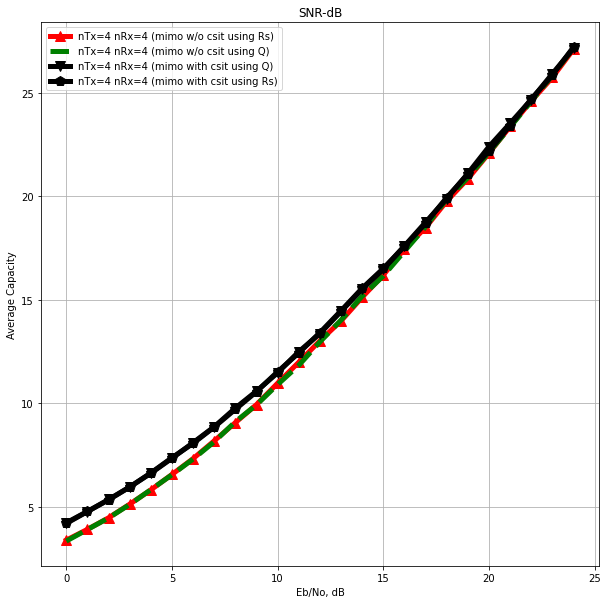

In [18]:
capacity_function = Capacity_Rs() 
capacity_reduced_form = capacity_reduced_form()
reduced_csit_result = reduced_csit()
csitRs_result = csit_Rs()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(eb_no_db, capacity_function, 'r^-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo w/o csit using Rs)')
plt.plot(eb_no_db, capacity_reduced_form, 'g--', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo w/o csit using Q)')
plt.plot(eb_no_db, reduced_csit_result, 'kv-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo with csit using Q)')
plt.plot(eb_no_db, csitRs_result, 'kp-', linewidth=5, markersize=10, label='nTx=4 nRx=4 (mimo with csit using Rs)')
plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Average Capacity')

plt.title('SNR-dB')

plt.show()